In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72           35.0      0.0  33.6   
1              1       85             66           29.0      0.0  26.6   
2              8      183             64            0.0      0.0  23.3   
3              1       89             66           23.0     94.0  28.1   
4              0      137             40           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76           48.0    180.0  32.9   
764            2      122             70           27.0      0.0  36.8   
765            5      121             72           23.0    112.0  26.2   
766            1      126             60            0.0      0.0  30.1   
767            1       93             70           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [ ]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72           35.0      0.0  33.6   
1              1       85             66           29.0      0.0  26.6   
2              8      183             64            0.0      0.0  23.3   
3              1       89             66           23.0     94.0  28.1   
4              0      137             40           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76           48.0    180.0  32.9   
764            2      122             70           27.0      0.0  36.8   
765            5      121             72           23.0    112.0  26.2   
766            1      126             60            0.0      0.0  30.1   
767            1       93             70           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.703407,68.929860,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
mean_SkinThickness = data.SkinThickness.mean()

In [ ]:
mean_Insulin= data.Insulin.mean()


In [ ]:
data['SkinThickness'].fillna(value=mean_SkinThickness ,inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
data['Insulin'].fillna(value=mean_Insulin,inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [ ]:
#scaler = StandardScaler()
#scaler.fit(x)
#standardized_data = scaler.transform(x)
#print(standardized_data)

In [ ]:
x=data.drop('Outcome',axis=1)
y=data.Outcome
print(x,y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72           35.0      0.0  33.6   
1              1       85             66           29.0      0.0  26.6   
2              8      183             64            0.0      0.0  23.3   
3              1       89             66           23.0     94.0  28.1   
4              0      137             40           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76           48.0    180.0  32.9   
764            2      122             70           27.0      0.0  36.8   
765            5      121             72           23.0    112.0  26.2   
766            1      126             60            0.0      0.0  30.1   
767            1       93             70           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=2)

In [ ]:
x_train.shape

(576, 8)

In [ ]:
y_train.shape

(576,)

In [ ]:
#from sklearn                        import metrics, svm
#from sklearn.svm                    import SVC
#model = svm.SVR(kernel='linear')
#model.fit(x_train,y_train)
#y_prid=model.predict(x_test)
#y_prid


In [ ]:
#x_train_prediction = model.predict(x_train)
#training_data_accuracy = accuracy_score(x_train_prediction,y_train)
#print(training_data_accuracy)

In [ ]:
#x_test_prediction = model.predict(x_test)
#test_data_accuracy = accuracy_score(x_test_prediction,y_test)
#print(test_data_accuracy)

In [ ]:
from sklearn.linear_model           import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [ ]:
#from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()

# fit the model with data
#logreg.fit(x_train,y_train)


#y_pred=logreg.predict(x_test)
#y_pred

In [ ]:
#from sklearn.tree                   import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#model.fit(x_train,y_train)
#print("DecisionTreeClassifier")
#y_pred=model.predict(x_test)
#y_pred

In [ ]:
accuracy=metrics.accuracy_score(y_test,y_pred)
Precision=metrics.precision_score(y_test, y_pred)
Recall=metrics.recall_score(y_test, y_pred)
print("Accuracy",accuracy )
print("precision",Precision )
print("Recall",Recall)

Accuracy 0.7708333333333334
precision 0.7446808510638298
Recall 0.5223880597014925


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  12],
       [ 32,  35]], dtype=int64)

In [ ]:
#Predicting system
test_sample = (5,166,72,19,175,25.8,0.587,51)
test_sample_as_numpy_array = np.asarray(test_sample)
input_data_reshape = test_sample_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)
if (prediction[0]== 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AttributeError: 'tuple' object has no attribute 'xaxis'

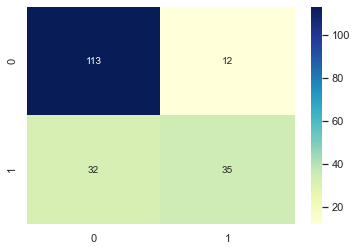

In [ ]:

# create heatmap
ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

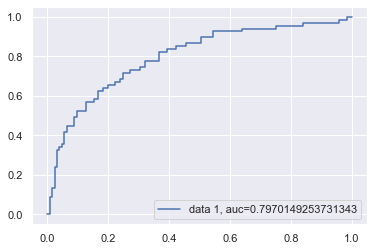

In [ ]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

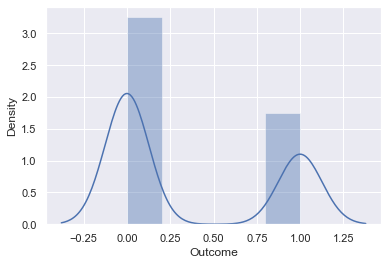

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.distplot(data['Outcome'])

Text(0, 0.5, 'BMI')

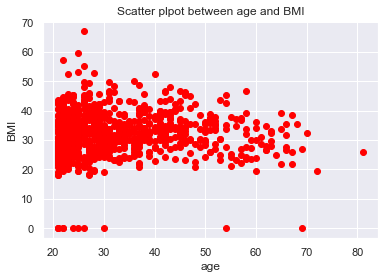

In [ ]:
plt.scatter(data['Age'],data['BMI'],c='red')
plt.title("Scatter plpot between age and BMI")
plt.xlabel("age")
plt.ylabel("BMI")

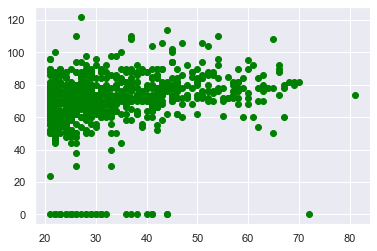

In [ ]:
plt.scatter(data['Age'],data['BloodPressure'],c='green')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

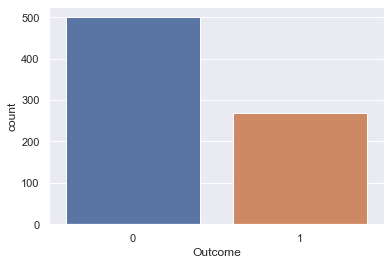

In [ ]:
sns.countplot(x="Outcome",data=data)

Text(0, 0.5, 'Insulin')

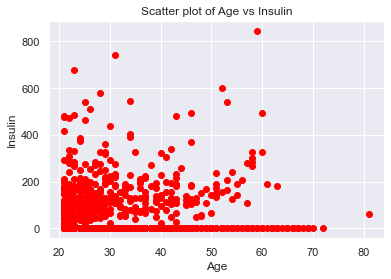

In [ ]:
plt.scatter(data['Age'],data['Insulin'],c='red')
plt.title('Scatter plot of Age vs Insulin')
plt.xlabel('Age')
plt.ylabel('Insulin')

<AxesSubplot:xlabel='Age', ylabel='BMI'>

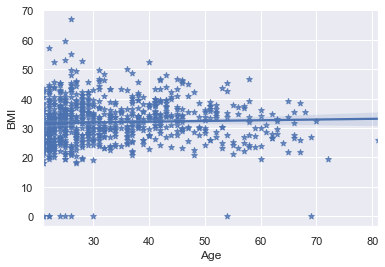

In [ ]:
sns.regplot(x=data["Age"],y=data["BMI"],marker="*")

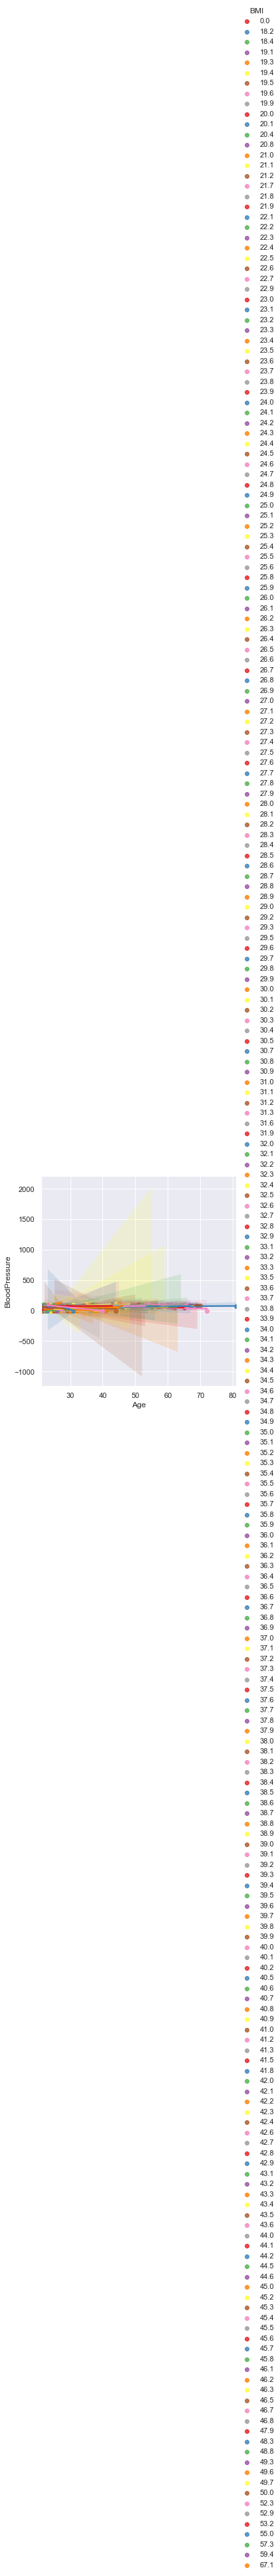

In [ ]:
sns.lmplot(x="Age",y="BloodPressure",data=data,hue='BMI',legend=True,palette="Set1")